# Importing Necessary Libraries

In [1]:
# PyTorch Libraries
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F

# To get MNIST dataset
import torchvision.datasets as dsets

# Array operations and visualizations
import matplotlib.pylab as plt
import numpy as np

# Function to plot an image

In [2]:
# Plot the data
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

<h2 id="Makeup_Data">MNIST DATA</h2> 

In [3]:
# Create the training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train


In [4]:
print(type(train_dataset),'contains ', len(train_dataset), " tuples")
print(type(train_dataset[0]), " has", len(train_dataset[0]), " tensors")
print(type(train_dataset[0][0])," dimension is ",train_dataset[0][0].shape )
print(type(train_dataset[0][1]))

<class 'torchvision.datasets.mnist.MNIST'> contains  60000  tuples
<class 'tuple'>  has 2  tensors
<class 'torch.Tensor'>  dimension is  torch.Size([1, 28, 28])
<class 'int'>


In [5]:
print(torch.max(train_dataset[3][0]))
print(torch.min(train_dataset[3][0]))
print(torch.unique(train_dataset[3][0]))

tensor(1.)
tensor(0.)
tensor([0.0000, 0.0314, 0.0471, 0.0588, 0.0784, 0.0902, 0.0941, 0.1216, 0.1255,
        0.1529, 0.1882, 0.2353, 0.2431, 0.2471, 0.2510, 0.2588, 0.2667, 0.3137,
        0.3490, 0.3686, 0.3765, 0.4078, 0.4863, 0.4941, 0.4980, 0.5490, 0.5922,
        0.6078, 0.6235, 0.6745, 0.7216, 0.7412, 0.7569, 0.7686, 0.8039, 0.8275,
        0.8627, 0.8667, 0.8941, 0.9176, 0.9216, 0.9255, 0.9412, 0.9569, 0.9686,
        0.9843, 0.9922, 1.0000])


In [6]:
# Create the validation dataset
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validation dataset:\n ", validation_dataset)

Print the validation dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train


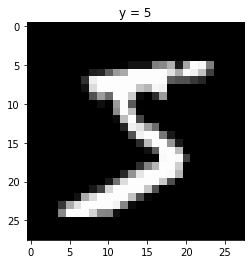

In [7]:
# Print the first image and label
show_data(train_dataset[0])

In [8]:
# Print the label
print("The label:", train_dataset[3][1])

The label: 1


In [9]:
# Created a training data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle = True)

# Created a validation data loader
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

# Creating a one layer network

In [10]:
class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self):
        super().__init__()
        # Creates a layer of given input size and output size
        self.layer1 = torch.nn.Linear(784, 10)
        
    # Prediction
    def forward(self, x):
        # Runs the x value through the single layers defined above
        x = self.layer1(x)
        x = F.softmax(x)
        return x
    
model = SoftMax()
print("The model:\n ", model)

# Creating dummy inputs to feed the model
dummy_input = torch.randn(1, 28*28) #You can create tensors in GPU directly instead of .cuda()
dummy_output = model(dummy_input)

# Dummy imput and output sizes
print(f'Dummy input shape: {dummy_input.shape}')
print(f'Dummy output shape: {dummy_output.shape}')

The model:
  SoftMax(
  (layer1): Linear(in_features=784, out_features=10, bias=True)
)
Dummy input shape: torch.Size([1, 784])
Dummy output shape: torch.Size([1, 10])


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


# Optimizer, loss function, and data loader

In [11]:
# The optimizer will updates the model parameters using the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
# The loss between the prediction and actual label values
loss_fn = nn.CrossEntropyLoss()

# Train the model and test

In [13]:
# Number of times we train our model useing the training data
n_epochs = 10

# Lists to keep track of loss and accuracy
loss_list = []
accuracy_list = []

# Loops n_epochs times
for epoch in range(n_epochs):
    
    # For each batch in the train loader
    for train_images, train_labels in train_loader:   
        
        # Flatten the images from [BATCH, 1, 28, 28] to [BATCH, 784]
        flat_images = train_images.reshape(-1, 28 * 28)
        
        # Makes a prediction based on the image tensor
        class_scores = model(flat_images)
        
        # Calculate the loss between the model output and actual class
        loss = loss_fn(class_scores, train_labels)
        
        # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
        optimizer.zero_grad() 
        
        # Calculates the gradient value with respect to each weight and bias
        loss.backward()
        
        # Updates the weight and bias according to calculated gradient value
        optimizer.step()
    
    # Append the calculated loss to the loss list
    loss_list.append(loss)    
       
    # Initialize true and false predictions to 0 for each iteration    
    true_predictions = 0
    false_predictions = 0

    # For each batch in the validation loader
    for test_images, test_labels in validation_loader:

        # Flatten the images from [BATCH, 1, 28, 28] to [BATCH, 784]
        flat_images = test_images.reshape(-1, 28 * 28)

        # Makes prediction based on image tensor
        class_scores = model(flat_images)

        # Finds the class with the highest probability
        class_predictions = torch.argmax(class_scores, dim=-1)

        # Number of true predictions in the batch using test_labels and class_predictions
        true_predictions_batch  = torch.sum(class_predictions == test_labels)
        false_predictions_batch = torch.sum(class_predictions != test_labels)

        true_predictions  += true_predictions_batch.item()
        false_predictions += false_predictions_batch.item()

    # Calculate accuracy for each iteration        
    accuracy = true_predictions / (true_predictions + false_predictions)
    accuracy_list.append(accuracy)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


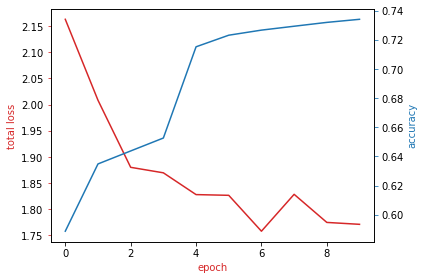

In [14]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


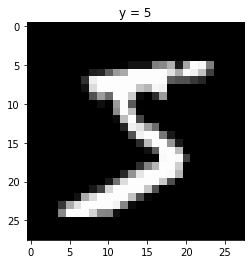

yhat: tensor([3])
probability of class  0.1986187994480133


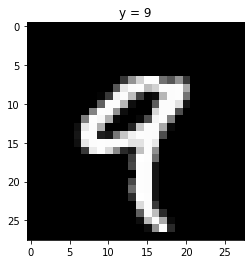

yhat: tensor([4])
probability of class  0.18571630120277405


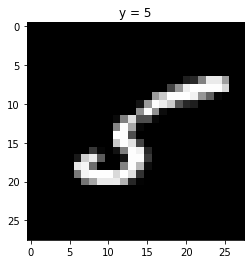

yhat: tensor([1])
probability of class  0.12394531816244125


In [15]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0

for test_images, test_labels in validation_dataset:

    # Flatten the images from [BATCH, 1, 28, 28] to [BATCH, 784]
    flat_images = test_images.reshape(-1, 28 * 28)
    
    # Makes prediction based on image tensor
    class_scores = model(flat_images)
    
    # Finds the class with the highest probability
    prob,class_predictions = torch.max(class_scores, 1)
    
    # Check whether the prediction is equal to actual value and show them
    if class_predictions != test_labels:
        show_data((test_images, test_labels))
        plt.show()
        print("Prediction:", class_predictions)
        print("Probability of class ", torch.max(Softmax_fn(class_scores)).item())
        count += 1
    if count >= 3:
        break       

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


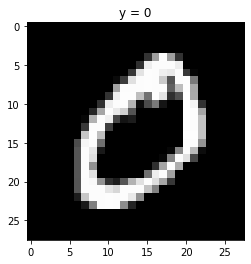

yhat: tensor([0])
probability of class  0.23156292736530304


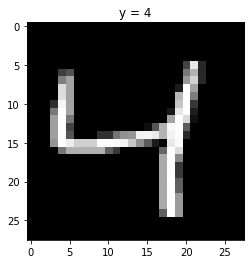

yhat: tensor([4])
probability of class  0.20022791624069214


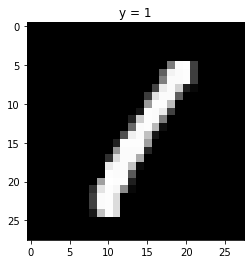

yhat: tensor([1])
probability of class  0.21769441664218903


In [16]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0

for test_images, test_labels in validation_dataset:

    # Flatten the images from [BATCH, 1, 28, 28] to [BATCH, 784]
    flat_images = test_images.reshape(-1, 28 * 28)
    
    # Makes prediction based on image tensor
    class_scores = model(flat_images)
    
    # Finds the class with the highest probability
    prob,class_predictions = torch.max(class_scores, 1)
    
    # Check whether the prediction is equal to actual value and show them
    if class_predictions == test_labels:
        show_data((test_images, test_labels))
        plt.show()
        print("Prediction:", class_predictions)
        print("Probability of class ", torch.max(Softmax_fn(class_scores)).item())
        count += 1
    if count >= 3:
        break       